In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.utils import np_utils
import os
import tensorflow_datasets as tfds
import PIL
import PIL.Image
import pathlib

In [ ]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

base_dir = ('/content/gdrive/MyDrive/Paddy big dataset/train_images')

Mounted at /content/gdrive


In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=124

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,sdx
    horizontal_flip=True,
    validation_split=0.2
    )
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.2
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 13083 images belonging to 10 classes.
Found 3266 images belonging to 10 classes.


In [ ]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=20,padding='same',kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))#111*111
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.Conv2D(filters=30,padding='same',kernel_size=6,activation='relu'))#106*106
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))#63*63
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.Conv2D(filters=35,padding='same',kernel_size=4,activation='relu'))#60*60
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))#30*30
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.Conv2D(filters=40,padding='same',kernel_size=5,activation='relu'))#26*26
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))#13*13
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.Conv2D(filters=45,padding='same',kernel_size=7,activation='relu'))#10*10
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))#5*5
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.Conv2D(filters=30,padding='same',kernel_size=6,activation='relu'))#106*106
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))#63*63
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.Conv2D(filters=55,padding='same',kernel_size=5,activation='relu'))#10*10
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))#5*5
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.GlobalAveragePooling2D())

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(10,activation='softmax'))


In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 224, 224, 20)      560       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 20)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 20)     80        
 ormalization)                                                   
                                                                 
 conv2d_23 (Conv2D)          (None, 112, 112, 30)      21630     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 30)       0         
 2D)                                                             
                                                        

In [ ]:
from keras import backend as K
K.set_value(cnn.optimizer.learning_rate, 0.00050)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive//Paddy big dataset/model training'+'/checkpoint_{epoch:02d}', save_freq='epoch')
cnn.fit(train_datagen,epochs=20,validation_data=test_datagen,callbacks=[checkpoint])

Epoch 1/20
106/106 [==============================] - 216s 2s/step - loss: 0.0648 - accuracy: 0.9785 - val_loss: 1.0764 - val_accuracy: 0.7593
Epoch 2/20
106/106 [==============================] - 215s 2s/step - loss: 0.0619 - accuracy: 0.9799 - val_loss: 1.6783 - val_accuracy: 0.6733
Epoch 3/20
106/106 [==============================] - 214s 2s/step - loss: 0.0723 - accuracy: 0.9765 - val_loss: 1.4255 - val_accuracy: 0.6966
Epoch 4/20
106/106 [==============================] - 214s 2s/step - loss: 0.0565 - accuracy: 0.9811 - val_loss: 1.1246 - val_accuracy: 0.7713
Epoch 5/20
106/106 [==============================] - 215s 2s/step - loss: 0.0609 - accuracy: 0.9798 - val_loss: 1.0060 - val_accuracy: 0.7829
Epoch 6/20
106/106 [==============================] - 216s 2s/step - loss: 0.0690 - accuracy: 0.9767 - val_loss: 0.8903 - val_accuracy: 0.8010
Epoch 7/20
106/106 [==============================] - 227s 2s/step - loss: 0.0477 - accuracy: 0.9843 - val_loss: 1.1955 - val_accuracy: 0.7091

In [ ]:
cnn.save(os.path.join('/content/gdrive/MyDrive/','rice_disease_model2\_white.h5'))  # creates a HDF5 file 'my_model.h5'

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

cnn.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

cnn.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = cnn.fit_generator(generator=train_datagen,
                                steps_per_epoch=train_datagen.n//train_datagen.batch_size,
                                epochs=10,
                                validation_data = test_datagen,
                                validation_steps = test_datagen.n//test_datagen.batch_size,
                                callbacks=callbacks_list
                                )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 0.0550 - accuracy: 0.9821WARNING:tensorflow:Can save best model only with val_acc available, skipping.


105/105 [==============================] - 219s 2s/step - loss: 0.0550 - accuracy: 0.9821 - val_loss: 0.8195 - val_accuracy: 0.8148 - lr: 0.0010
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9845WARNING:tensorflow:Can save best model only with val_acc available, skipping.


105/105 [==============================] - 209s 2s/step - loss: 0.0482 - accuracy: 0.9845 - val_loss: 1.0166 - val_accuracy: 0.7925 - lr: 0.0010
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9875WARNING:tensorflow:Can save best model only with val_acc available, skipping.


105/105 [==============================] - 228s 2s/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 1.1142 - val_accuracy: 0.7680 - lr: 0.0010
Epoch 4/10
105/105 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9857Restoring model weights from the end of the best epoch: 1.



Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
105/105 [==============================] - 209s 2s/step - loss: 0.0440 - accuracy: 0.9857 - val_loss: 1.1135 - val_accuracy: 0.7779 - lr: 0.0010
Epoch 4: early stopping


In [ ]:
results = cnn.evaluate(test_datagen, verbose=2)
print(results)
print(f"Test Accuracy: {np.round(results[1] * 100,2)}%")

27/27 - 22s - loss: 0.8154 - accuracy: 0.8154 - 22s/epoch - 827ms/step
[0.8154205679893494, 0.815370500087738]
Test Accuracy: 81.54%


In [ ]:
predictions = np.argmax(cnn.predict(test_datagen), axis=1)
matrix = confusion_matrix(test_datagen.labels, predictions)
report= classification_report(test_datagen.labels, predictions, target_names=test_datagen.class_indices, zero_division=0)

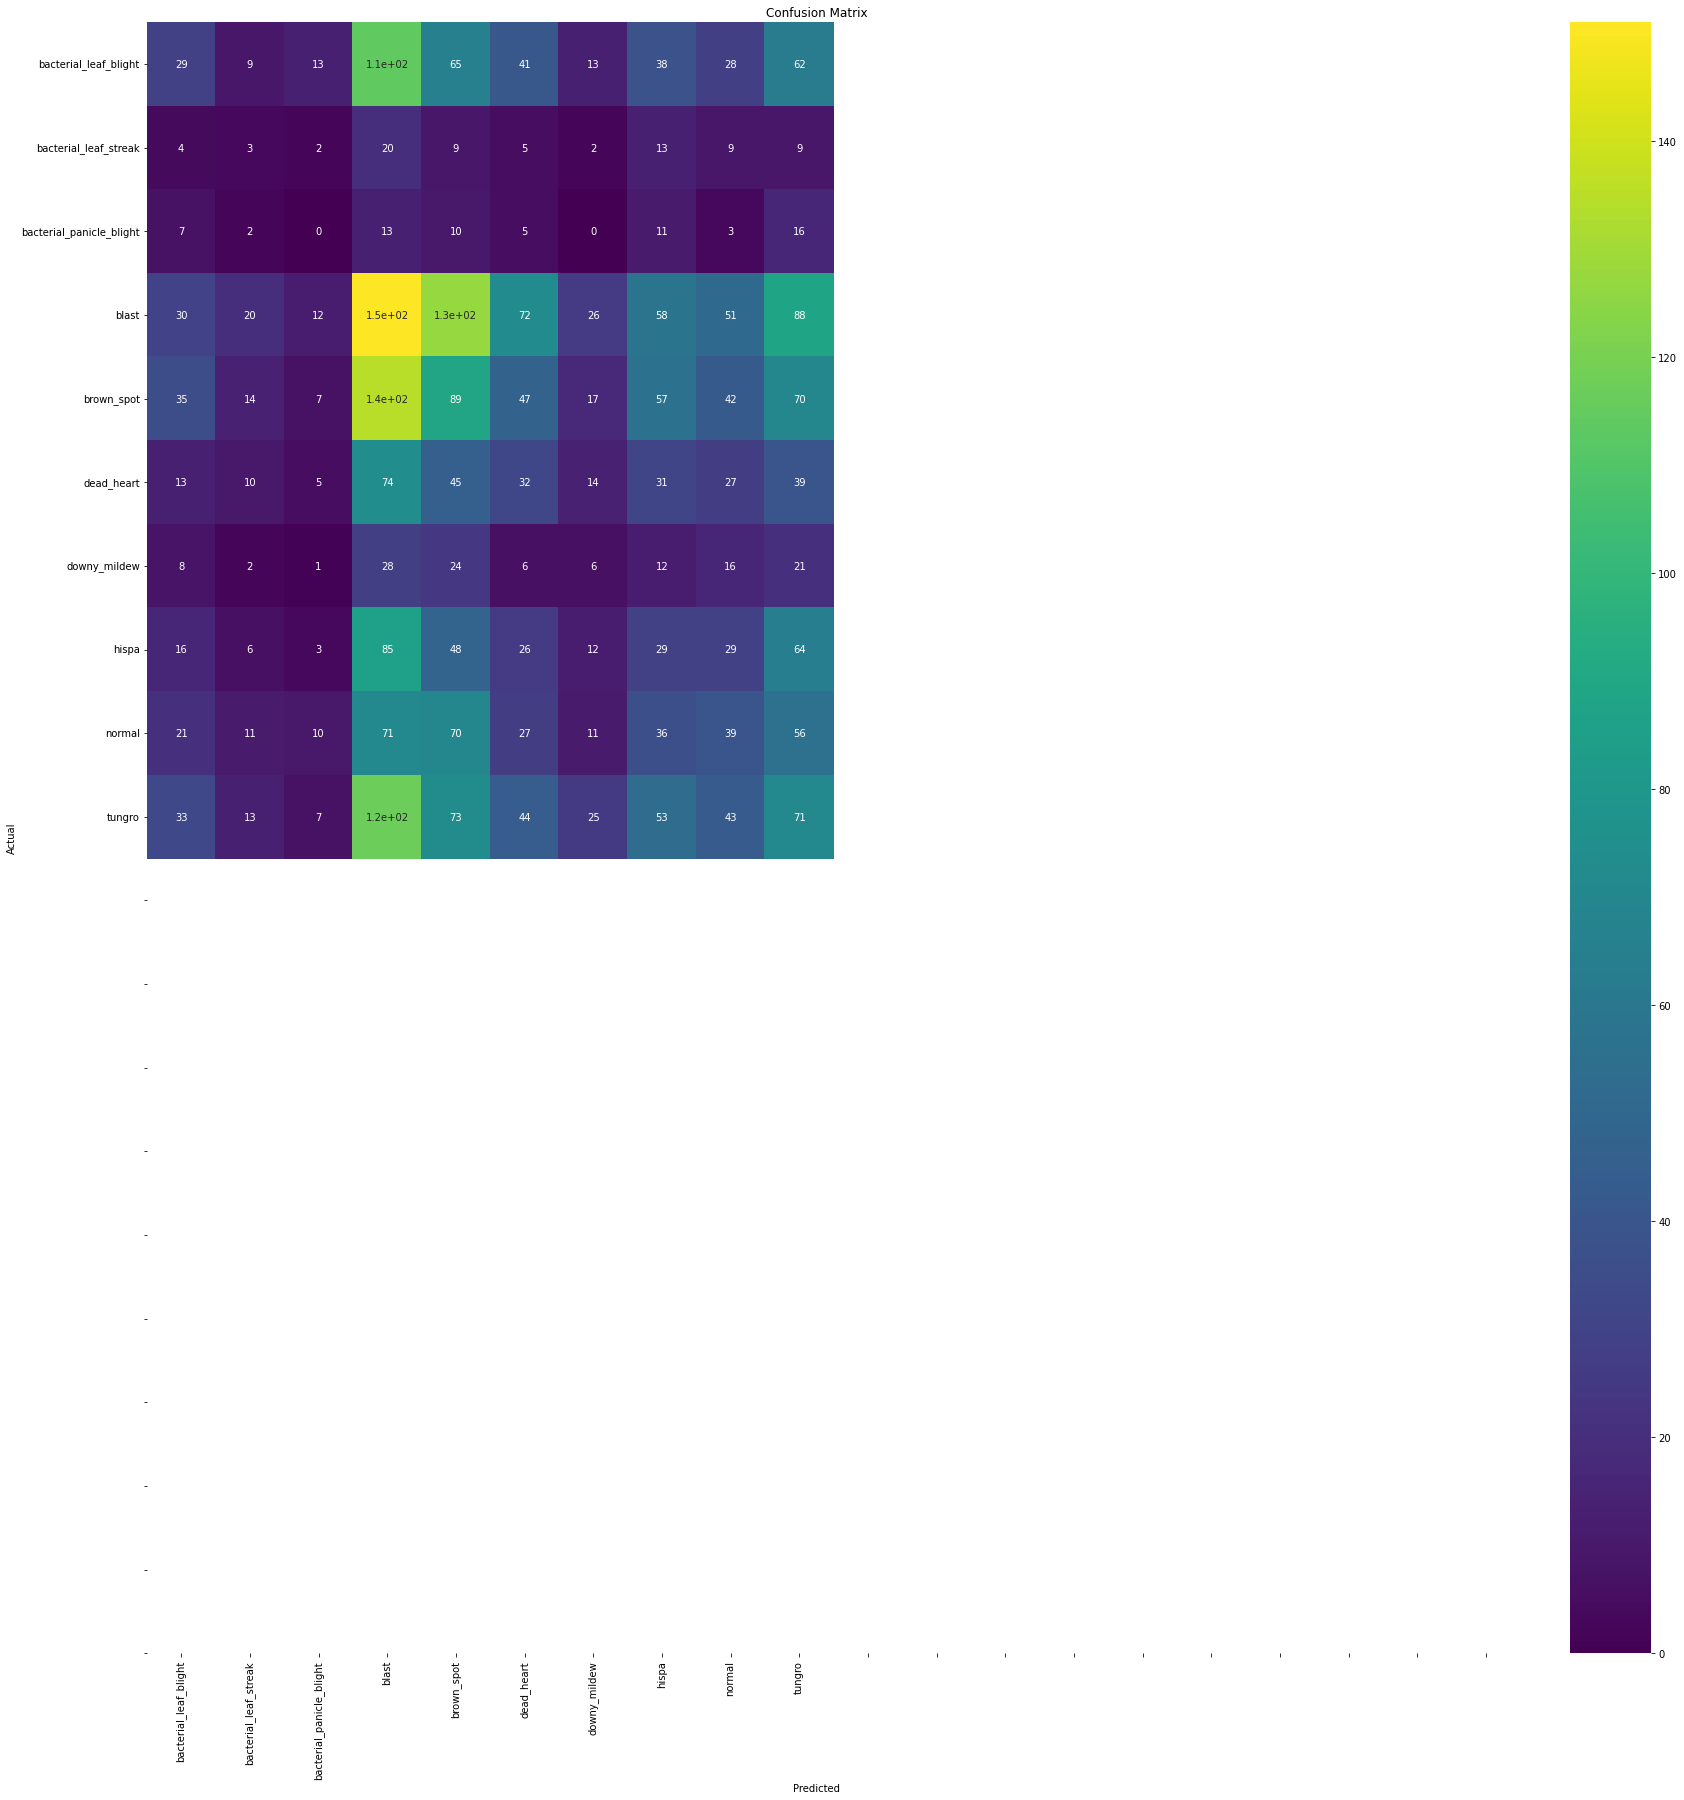

In [ ]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(matrix, annot=True, cmap='viridis')
plt.xticks(ticks=np.arange(20) + 0.5, labels=test_datagen.class_indices, rotation=90)
plt.yticks(ticks=np.arange(20) + 0.5, labels=test_datagen.class_indices, rotation=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
fig.savefig("Confusion Matrix",dpi=700)

In [ ]:
print("Classification Report:\n", report)

Classification Report:
                           precision    recall  f1-score   support

   bacterial_leaf_blight       0.15      0.07      0.10       412
   bacterial_leaf_streak       0.03      0.04      0.04        76
bacterial_panicle_blight       0.00      0.00      0.00        67
                   blast       0.19      0.24      0.21       635
              brown_spot       0.16      0.17      0.17       513
              dead_heart       0.10      0.11      0.11       290
            downy_mildew       0.05      0.05      0.05       124
                   hispa       0.09      0.09      0.09       318
                  normal       0.14      0.11      0.12       352
                  tungro       0.14      0.15      0.15       479

                accuracy                           0.14      3266
               macro avg       0.10      0.10      0.10      3266
            weighted avg       0.14      0.14      0.13      3266



In [ ]:
data_his = pd.DataFrame(history.history)
data_his

,loss,accuracy,val_loss,val_accuracy,lr
0,0.055043,0.982097,0.819515,0.814826,0.001
1,0.048196,0.984490,1.016627,0.792494,0.001
2,0.039131,0.987499,1.114184,0.767990,0.001
3,0.043952,0.985724,1.113545,0.777916,0.001


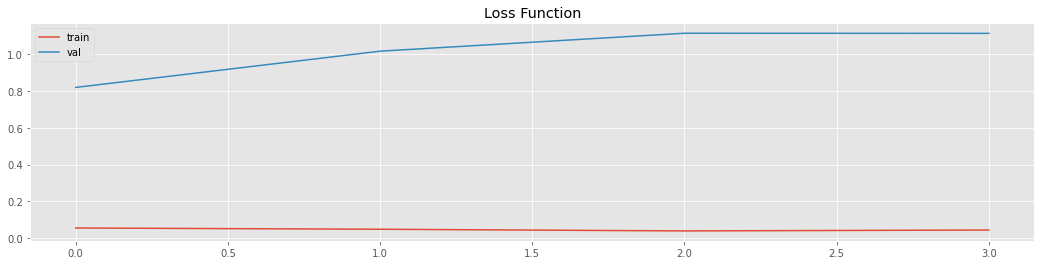

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function",dpi=700)

In [ ]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['accuracy'], label = 'train')
plt.plot(data_his['val_accuracy'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig.savefig("Accuracy Function",dpi=700)